In [676]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from adjustText import adjust_text 


In [677]:
df = pd.read_csv("data/dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21513 entries, 0 to 21512
Data columns (total 90 columns):
 #   Column                                                                                                          Non-Null Count  Dtype  
---  ------                                                                                                          --------------  -----  
 0   id_istat                                                                                                        21513 non-null  int64  
 1   id_comune                                                                                                       21512 non-null  object 
 2   Provincia                                                                                                       21513 non-null  object 
 3   Regione                                                                                                         21513 non-null  object 
 4   Ripartizione Geografica                 

In [678]:
id_comune = df["id_comune"]

In [679]:
color_blue = "deepskyblue"
color_green = "mediumseagreen"
color_pink = "hotpink"
color_yellow = "gold"
color_purple = "mediumorchid"
color_orange = "darkorange"
color_mint = "mediumaquamarine"
color_lavender = "blueviolet"
color_sky = "cadetblue"
color_rose = "lightcoral"
color_red = "indianred"
color_black = "black"
color_white = "white"


## PCA su variabili economiche e PCA su variabili turistiche 

In [680]:
# andiamo a selezionare le colonne che ci interessano
var_economiche = df[["Reddito Pro-Capite per l'anno di riferimento", "Reddito da fabbricati - Frequenza", "Reddito da lavoro dipendente e assimilati - Frequenza", "Reddito da pensione - Frequenza", "Reddito da lavoro autonomo (comprensivo dei valori nulli) - Frequenza", "Reddito di spettanza dell'imprenditore in contabilita' ordinaria  (comprensivo dei valori nulli) - Frequenza", "Reddito di spettanza dell'imprenditore in contabilita' semplificata (comprensivo dei valori nulli) - Frequenza", "Reddito complessivo minore o uguale a zero euro - Frequenza", "Reddito complessivo da 0 a 10000 euro - Frequenza", "Reddito complessivo da 10000 a 15000 euro - Frequenza", "Reddito complessivo da 15000 a 26000 euro - Frequenza", "Reddito complessivo da 26000 a 55000 euro - Frequenza", "Reddito complessivo da 55000 a 75000 euro - Frequenza", "Reddito complessivo da 75000 a 120000 euro - Frequenza", "Reddito complessivo oltre 120000 euro - Frequenza"]]

# Rinominare le colonne con nomi più corti
short_names = [
    "Reddito_ProCapite", "Reddito_Fabbricati", "Reddito_LavoroDip", "Reddito_Pensione",
    "Reddito_LavoroAut", "Reddito_ImpresaOrd", "Reddito_ImpresaSemp", "Reddito_Zero",
    "Reddito_0_10k", "Reddito_10k_15k", "Reddito_15k_26k", "Reddito_26k_55k",
    "Reddito_55k_75k", "Reddito_75k_120k", "Reddito_120k_Plus"
]
var_economiche.columns = short_names

# Controllare la presenza di valori NaN
nan_summary = var_economiche.isna().sum()
print("Valori NaN per colonna:")
print(nan_summary)


Valori NaN per colonna:
Reddito_ProCapite      0
Reddito_Fabbricati     0
Reddito_LavoroDip      0
Reddito_Pensione       0
Reddito_LavoroAut      0
Reddito_ImpresaOrd     0
Reddito_ImpresaSemp    0
Reddito_Zero           0
Reddito_0_10k          0
Reddito_10k_15k        0
Reddito_15k_26k        0
Reddito_26k_55k        0
Reddito_55k_75k        0
Reddito_75k_120k       0
Reddito_120k_Plus      0
dtype: int64


In [681]:
# andiamo ad impostare lo scaler che serve per standardizzare i dati
scaler = StandardScaler()

# Effettuiamo la PCA sulle variabili economiche CON gli outlier

In [682]:
cols = var_economiche.columns

# Standardize the data
df_standardized = scaler.fit_transform(var_economiche)
df_standardized = pd.DataFrame(df_standardized, columns=cols) #Ricreo df perchè lo scaler restituisce array
df_standardized.head()

,Reddito_ProCapite,Reddito_Fabbricati,Reddito_LavoroDip,Reddito_Pensione,Reddito_LavoroAut,Reddito_ImpresaOrd,Reddito_ImpresaSemp,Reddito_Zero,Reddito_0_10k,Reddito_10k_15k,Reddito_15k_26k,Reddito_26k_55k,Reddito_55k_75k,Reddito_75k_120k,Reddito_120k_Plus
0,0.843704,-0.187346,-0.190875,-0.196585,-0.170514,-0.239511,-0.217233,-0.163508,-0.193198,-0.202689,-0.208263,-0.184274,-0.164506,-0.165172,-0.156881
1,0.843704,-0.187346,-0.190875,-0.196585,-0.170514,-0.239511,-0.217233,-0.163508,-0.193198,-0.202689,-0.208263,-0.184274,-0.164506,-0.165172,-0.156881
2,0.379584,-0.182921,-0.186187,-0.194621,-0.172901,-0.235830,-0.214905,-0.163508,-0.191748,-0.197789,-0.202226,-0.180386,-0.163984,-0.165540,-0.160843
3,0.379584,-0.182921,-0.186187,-0.194621,-0.172901,-0.235830,-0.214905,-0.163508,-0.191748,-0.197789,-0.202226,-0.180386,-0.163984,-0.165540,-0.160843
4,0.734308,-0.194467,-0.197917,-0.206286,-0.175070,-0.254235,-0.228584,-0.163508,-0.199422,-0.210062,-0.220251,-0.191551,-0.170667,-0.167747,-0.160843


In [683]:
# Fit the PCA
pca = PCA(n_components=df_standardized.shape[1]) #Componenti = numero di colonne
pca.fit(df_standardized)
# Transform the data
x_new_cols = df_standardized.columns
x_new = pca.fit_transform(df_standardized)
print("PCA shape: ", x_new.shape)
# Variance explained by each component
explained_variance = pca.explained_variance_ratio_
print("Explained variance: ", explained_variance)

PCA shape:  (21513, 15)
Explained variance:  [9.26539853e-01 6.01468661e-02 1.06875558e-02 1.18484028e-03
 8.89029568e-04 3.33216760e-04 1.11096998e-04 4.21892610e-05
 3.14976759e-05 1.58730266e-05 8.24124822e-06 4.96351461e-06
 3.51346527e-06 1.08263371e-06 1.80613267e-07]


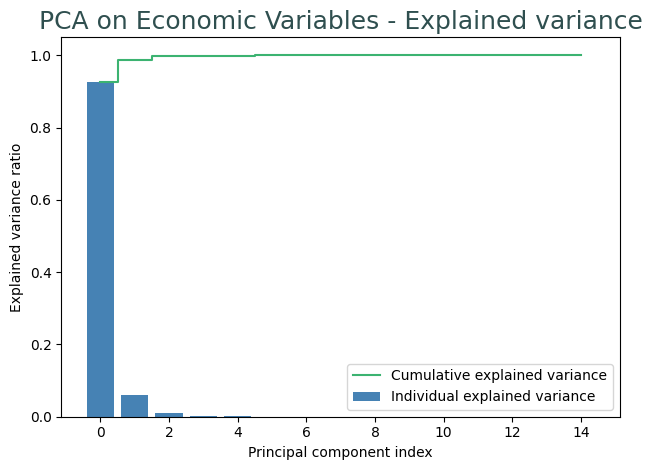

In [684]:
# Explained variance ratio
exp_var_pca = pca.explained_variance_ratio_
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
# Create the visualization plot
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, align='center', label='Individual explained variance', color='steelblue', alpha=1.0)
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance', color=color_green)
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.title('PCA on Economic Variables - Explained variance', color='darkslategray', fontsize=18, alpha=1.0)
plt.legend(loc='best')
plt.tight_layout()
plt.show()


# Con la prima variabile praticamente spieghiamo 95% della varianza del dataset 

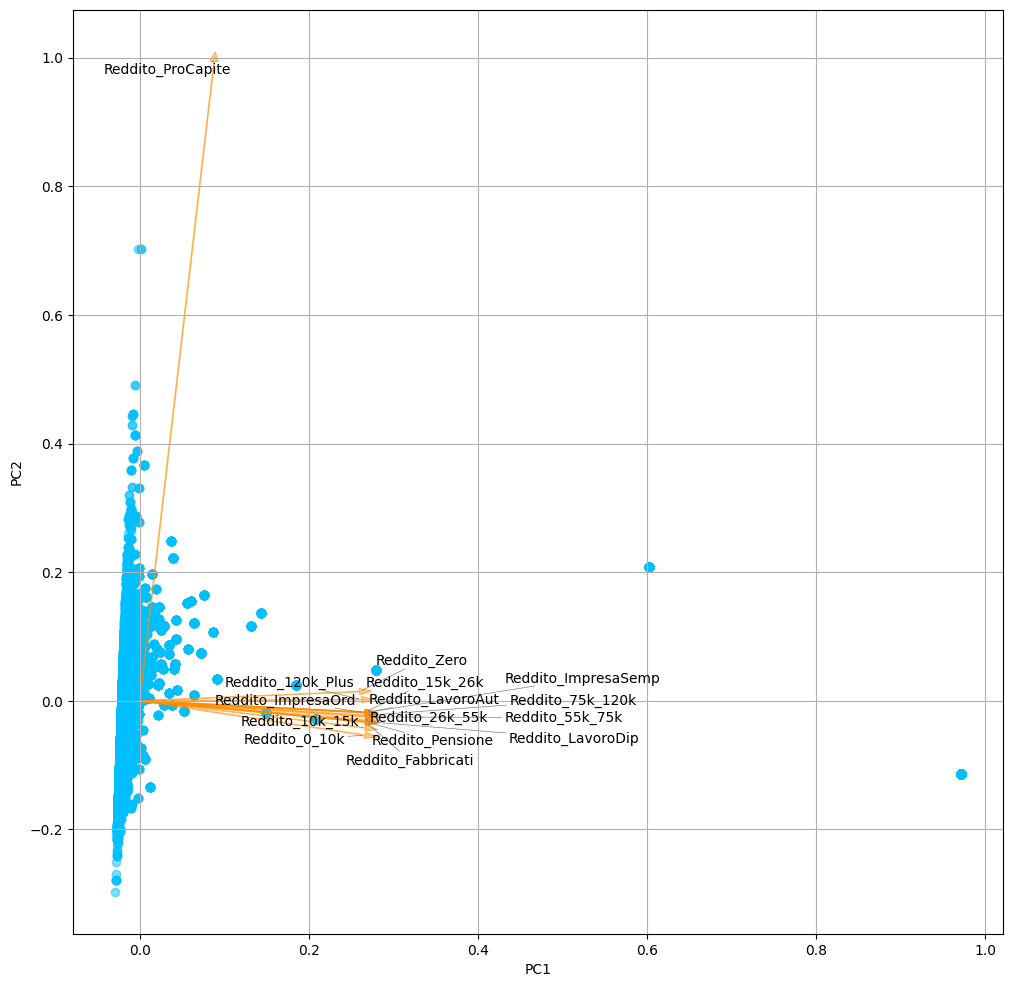

In [685]:
# Define a plot function
def myplot(score, coeff, labels=None):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    plt.figure(figsize=(12, 12))
    plt.scatter(xs * scalex, ys * scaley, alpha=0.5, color=color_blue)
    
    texts = []
    multplier = 1.0
    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color=color_orange, alpha=0.5, lw=0.8, head_width=0.01)
        text = plt.text(coeff[i, 0] * multplier, coeff[i, 1] * multplier, labels[i], color=color_black, ha='center', va='center')
        texts.append(text)
    
    # plt.xlim(-1, 1)
    # plt.ylim(-1, 1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()
    
    adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle='->', color='gray', lw=0.5))


# Use only the 2 PCs.
myplot(x_new[:, 0:2],np.transpose(pca.components_[0:2, :]), x_new_cols)
plt.show()

Minimum number of components to explain 80.0% of variance: 1


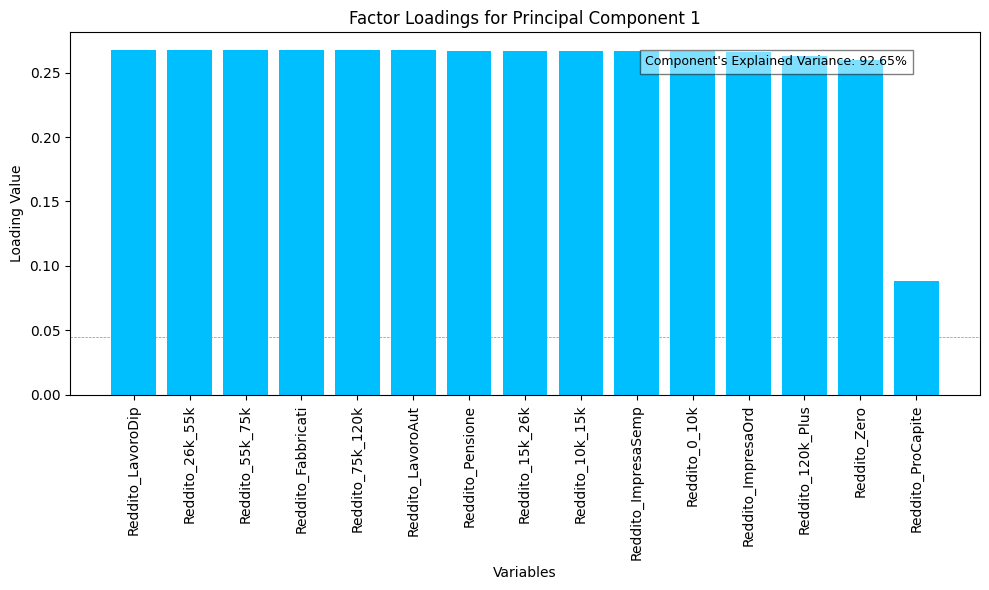

Minimum number of components to explain 80.0% of variance: 1


In [686]:
# Find index where cumulative explained variance is greater than a desired explained variance
desidered_explained_variance = 0.8
index_selected = next(x[0] for x in enumerate(cum_sum_eigenvalues) if x[1] > desidered_explained_variance) + 1
print(f'Minimum number of components to explain {desidered_explained_variance * 100}% of variance: {index_selected}')
loadings = pca.components_.T
# Plotting the components to gain an explained variance threshold before defined
for i in range(index_selected): # range(loadings.shape[1]) to plot all components
    sorted_idx = np.argsort(abs(loadings[:, i]))[::-1]
    sorted_loadings = loadings[sorted_idx, i]
    vars = x_new_cols[sorted_idx]
    std_loading = np.std(sorted_loadings)
    
    # Colors based on comparison with the mean
    colors = [color_blue if abs(loading) >= std_loading else color_yellow for loading in sorted_loadings]
    
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(sorted_loadings)), sorted_loadings, color=colors)
    plt.title(f'Factor Loadings for Principal Component {i+1}')
    plt.xticks(range(len(sorted_loadings)), vars, rotation=90)
    plt.xlabel('Variables')
    plt.ylabel('Loading Value')
    plt.axhline(std_loading, color=color_blue, linestyle='--', linewidth=0.5)
    plt.axhline(0, color='black', linewidth=0.7)
    
    if sorted_loadings.min() < std_loading * -1:
        plt.axhline(-std_loading, color=color_blue, linestyle='--', linewidth=0.5)
        
    explained_variance = exp_var_pca[i] * 100  # convert to percentage
    textstr = f"Component's Explained Variance: {explained_variance:.2f}%"
    # Place the text box in the upper left corner
    plt.gcf().text(0.65, 0.9, textstr, fontsize=9, verticalalignment='top', bbox=dict(facecolor=color_white, alpha=0.5))
    plt.tight_layout()
    plt.show()
    
# Find index where cumulative explained variance is greater than a desired explained variance
desidered_explained_variance = 0.8
index_selected = next(x[0] for x in enumerate(cum_sum_eigenvalues) if x[1] > desidered_explained_variance) + 1
print(f'Minimum number of components to explain {desidered_explained_variance * 100}% of variance: {index_selected}')

In [687]:
x_newdf = pd.DataFrame(x_new[:, :index_selected], columns=[f"PC{i+1}" for i in range(index_selected)])
x_newdf["id_comune"] = id_comune
x_newdf.sort_values(by="PC1", ascending=False).iloc[15000:15010]


,PC1,id_comune
10550,-0.724618,Mesola
10552,-0.724618,Mesola
10551,-0.724618,Mesola
10549,-0.724618,Mesola
20136,-0.724651,Terralba
20135,-0.724651,Terralba
1405,-0.724689,Albugnano
4503,-0.724764,Carona
15719,-0.724785,Introdacqua
11540,-0.724830,Pieve Fosciana


In [688]:
x_newdf["id_comune"].nunique()

7873

In [689]:
# Create a DataFrame with the principal components
principal_components_df = pd.DataFrame(x_new, columns=[f'PC{i+1}' for i in range(x_new.shape[1])])

# Display the first few rows of the new DataFrame
print(principal_components_df.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.628915  0.902381  0.016959 -0.073986 -0.015026  0.034459 -0.005977   
1 -0.628915  0.902381  0.016959 -0.073986 -0.015026  0.034459 -0.005977   
2 -0.662494  0.439964  0.031561 -0.061207 -0.017302  0.019975 -0.008137   
3 -0.662494  0.439964  0.031561 -0.061207 -0.017302  0.019975 -0.008137   
4 -0.665231  0.796226  0.032865 -0.076823 -0.016804  0.036536 -0.009591   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0  0.001256 -0.005750  0.001053 -0.000942 -0.000154 -0.000349 -0.001287   
1  0.001256 -0.005750  0.001053 -0.000942 -0.000154 -0.000349 -0.001287   
2  0.000480 -0.003881 -0.001685 -0.003248  0.000497 -0.000748 -0.000875   
3  0.000480 -0.003881 -0.001685 -0.003248  0.000497 -0.000748 -0.000875   
4  0.001209 -0.006951  0.000669 -0.001937 -0.000528 -0.000288  0.001195   

       PC15  
0  0.000339  
1  0.000339  
2  0.000107  
3  0.000107  
4  0.000093  


## PCA SU VARIABILI TURISTICHE

In [690]:
df = pd.get_dummies(df, columns= ['Tipo di località'])

In [691]:
# andiamo a selezionare le colonne che ci interessano
var_turistiche = df[['Esercizi a 5 stelle', 'Letti', 'Camere', 'Bagni', 'Esercizi a 4 stelle', 'Letti.1', 'Camere.1', 'Bagni.1', 'Esercizi a 3 stelle', 'Letti.2', 'Camere.2', 'Bagni.2', 'Esercizi a 2 stelle', 'Letti.3', 'Camere.3', 'Bagni.3', 'Esercizi a 1 stella', 'Letti.4', 'Camere.4', 'Bagni.4', 'Esercizi turistico-alberghiere', 'Letti.5', 'Camere.5', 'Bagni.5', 'Esercizi alberghieri', 'Letti.6', 'Camere.6', 'Bagni.6', 'Numero campeggi e villaggi turistici', 'Letti.7', 'Numero di alloggi in affitto gestiti in forma imprenditoriale', 'Letti.8', 'Numero di agriturismi', 'Letti.9', 'Numero di ostelli per la gioventù', 'Letti.10', 'Numero di case per ferie', 'Letti.11', 'Numero di rifugi alpini', 'Letti.12', 'Numero di altri esercizi ricettivi', 'Letti.13', 'Numero di b&b', 'Letti.14', 'Numero di esercizi extra-alberghieri', 'Letti.15', 'Numero', 'Letti.16']]


# Controllare la presenza di valori NaN
nan_summary = var_turistiche.isna().sum()
print("Valori NaN per colonna:")
print(nan_summary)


Valori NaN per colonna:
Esercizi a 5 stelle                                              0
Letti                                                            0
Camere                                                           0
Bagni                                                            0
Esercizi a 4 stelle                                              0
Letti.1                                                          0
Camere.1                                                         0
Bagni.1                                                          0
Esercizi a 3 stelle                                              0
Letti.2                                                          0
Camere.2                                                         0
Bagni.2                                                          0
Esercizi a 2 stelle                                              0
Letti.3                                                          0
Camere.3                              

In [692]:
cols2 = var_turistiche.columns

# Standardize the data
df_standardized2 = scaler.fit_transform(var_turistiche)
df_standardized2 = pd.DataFrame(df_standardized2, columns=cols2) #Ricreo df perchè lo scaler restituisce array
df_standardized2.head()

,Esercizi a 5 stelle,Letti,Camere,Bagni,Esercizi a 4 stelle,Letti.1,Camere.1,Bagni.1,Esercizi a 3 stelle,Letti.2,...,Numero di rifugi alpini,Letti.12,Numero di altri esercizi ricettivi,Letti.13,Numero di b&b,Letti.14,Numero di esercizi extra-alberghieri,Letti.15,Numero,Letti.16
0,-0.157816,-0.233586,-0.23204,-0.231381,-0.180089,-0.457242,-0.44403,-0.444145,-0.204711,-0.527877,...,-0.203772,-0.158171,-0.154297,-0.201514,-0.213694,-0.187096,-0.302364,-0.240220,-0.341278,-0.28420
1,-0.157816,-0.233586,-0.23204,-0.231381,-0.180089,-0.457242,-0.44403,-0.444145,-0.204711,-0.527877,...,-0.203772,-0.158171,-0.154297,-0.201514,-0.213694,-0.187096,-0.302364,-0.240220,-0.341278,-0.28420
2,-0.157816,-0.233586,-0.23204,-0.231381,-0.180089,-0.457242,-0.44403,-0.444145,-0.204711,-0.527877,...,-0.203772,-0.158171,-0.154297,-0.201514,-0.308319,-0.383609,-0.383721,-0.554826,-0.421594,-0.59831
3,-0.157816,-0.233586,-0.23204,-0.231381,-0.180089,-0.457242,-0.44403,-0.444145,-0.204711,-0.527877,...,-0.203772,-0.158171,-0.154297,-0.201514,-0.308319,-0.383609,-0.383721,-0.554826,-0.421594,-0.59831
4,-0.157816,-0.233586,-0.23204,-0.231381,-0.180089,-0.457242,-0.44403,-0.444145,-0.166073,-0.076530,...,-0.203772,-0.158171,-0.154297,-0.201514,-0.284663,-0.347880,-0.365642,-0.244916,-0.376974,0.20806


In [693]:
# Fit the PCA
pca = PCA(n_components=df_standardized2.shape[1]) #Componenti = numero di colonne
pca.fit(df_standardized2)
# Transform the data
x_new_cols = df_standardized2.columns
x_new = pca.fit_transform(df_standardized2)

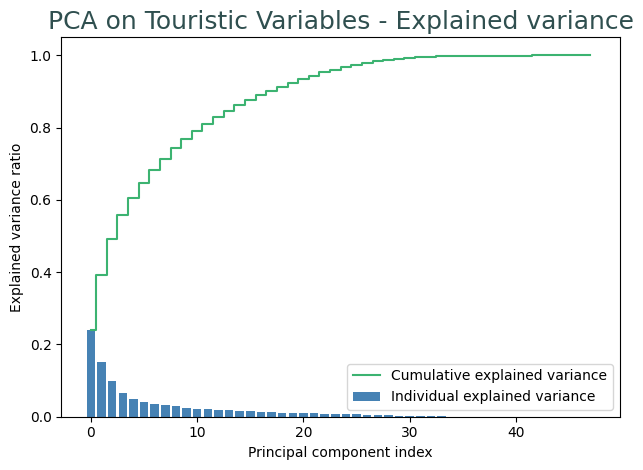

In [694]:
# Explained variance ratio
exp_var_pca = pca.explained_variance_ratio_
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
# Create the visualization plot
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, align='center', label='Individual explained variance', color='steelblue', alpha=1.0)
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance', color=color_green)
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.title('PCA on Touristic Variables - Explained variance', color='darkslategray', fontsize=18, alpha=1.0)
plt.legend(loc='best')
plt.tight_layout()
plt.show()


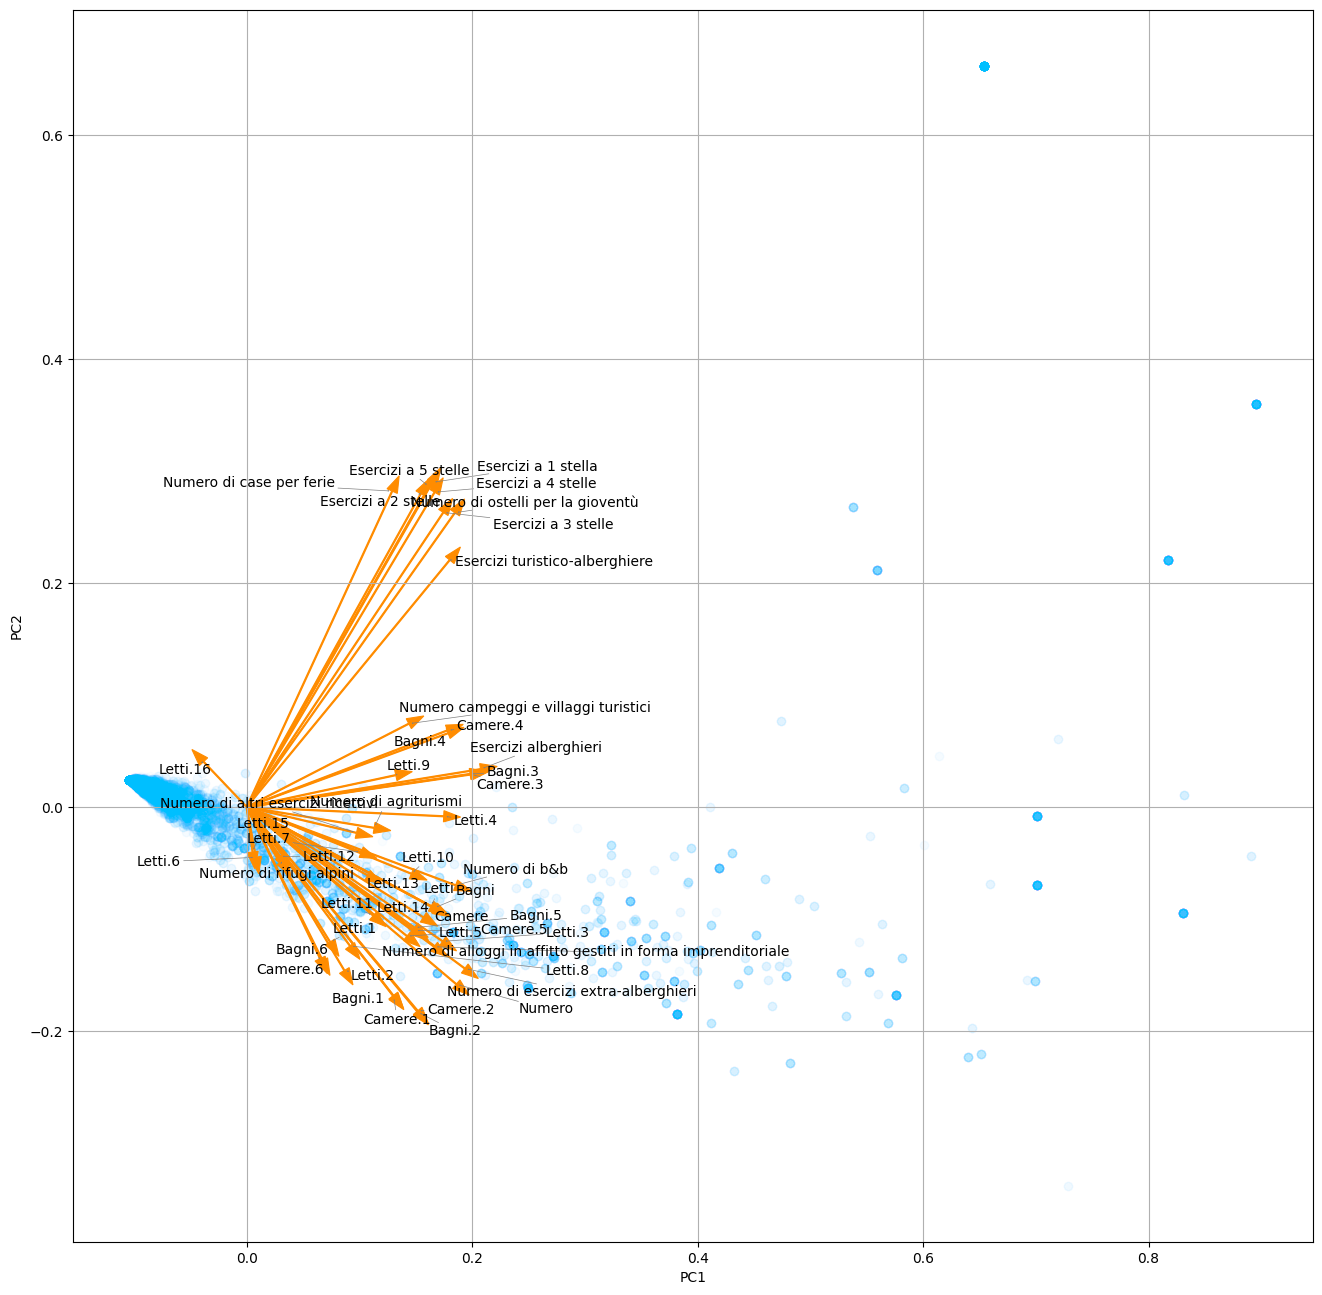

In [695]:
# Define a plot function
def myplot(score, coeff, labels=None):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    plt.figure(figsize=(16,16))
    plt.scatter(xs * scalex, ys * scaley, alpha=0.02, color=color_blue)
    
    texts = []
    multplier = 1.0
    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color=color_orange, alpha=1, lw=0.8, head_width=0.01)
        text = plt.text(coeff[i, 0] * multplier, coeff[i, 1] * multplier, labels[i], color=color_black, ha='center', va='center')
        texts.append(text)
    
    # plt.xlim(-1, 1)
    # plt.ylim(-1, 1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()
    
    adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle='->', color='gray', lw=0.5))


# Use only the 2 PCs.
myplot(x_new[:, 0:2],np.transpose(pca.components_[0:2, :]), x_new_cols)
plt.show()

Minimum number of components to explain 80.0% of variance: 12


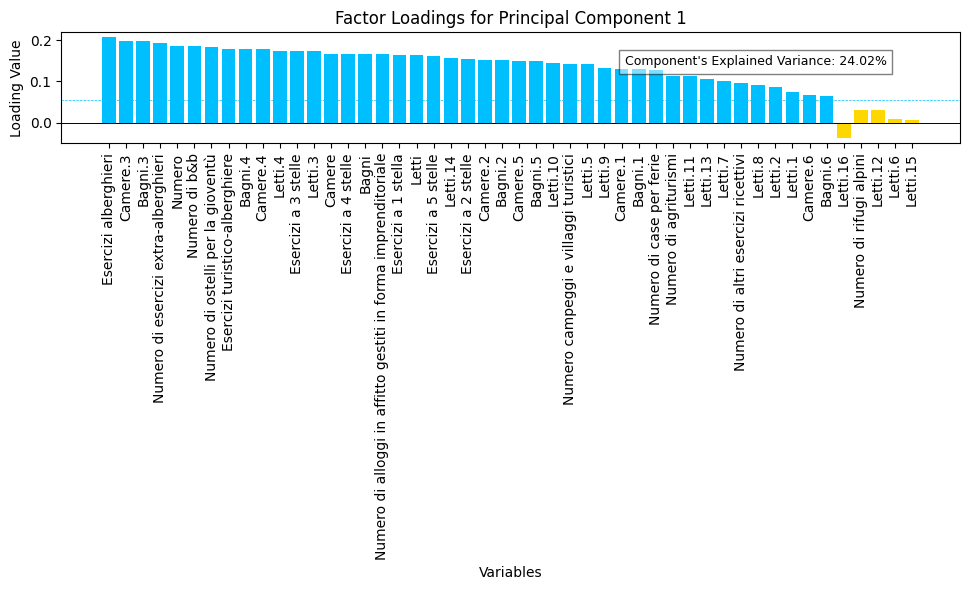

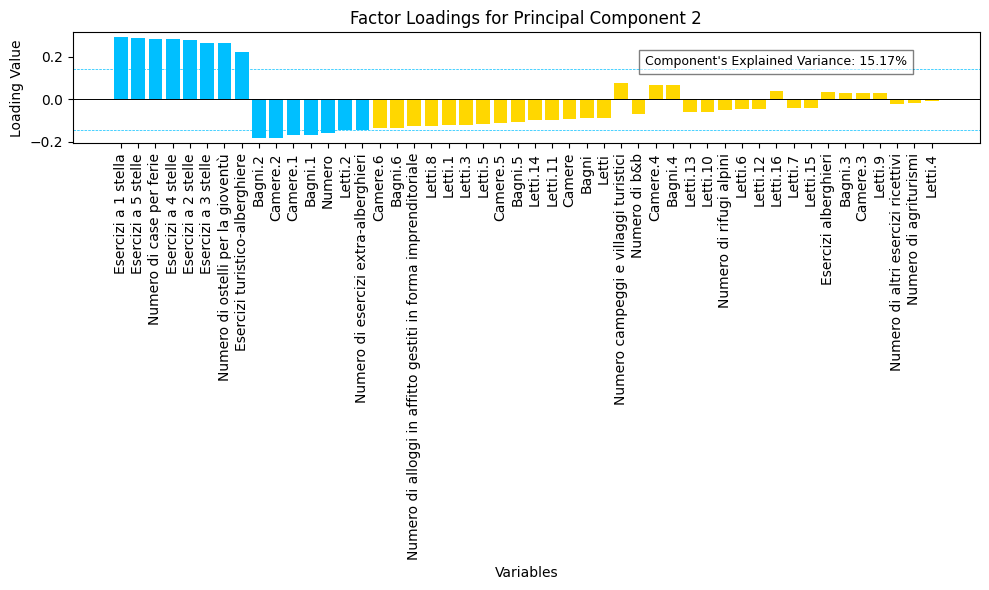

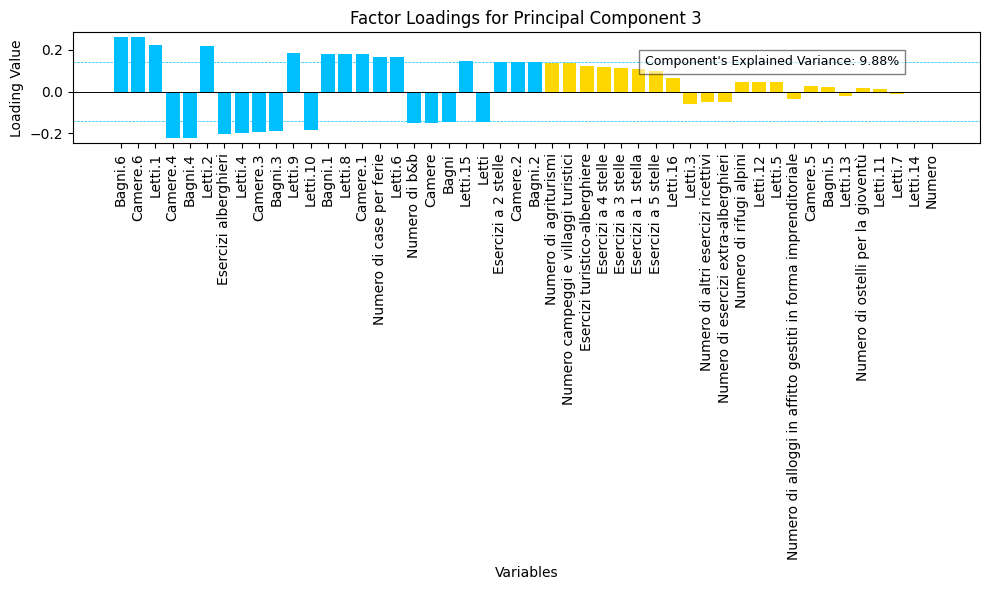

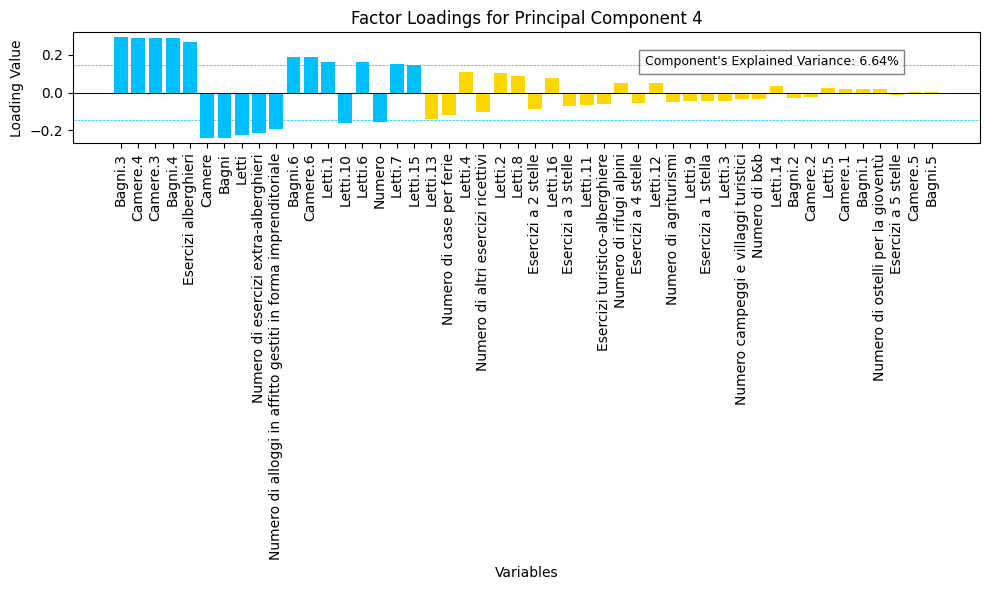

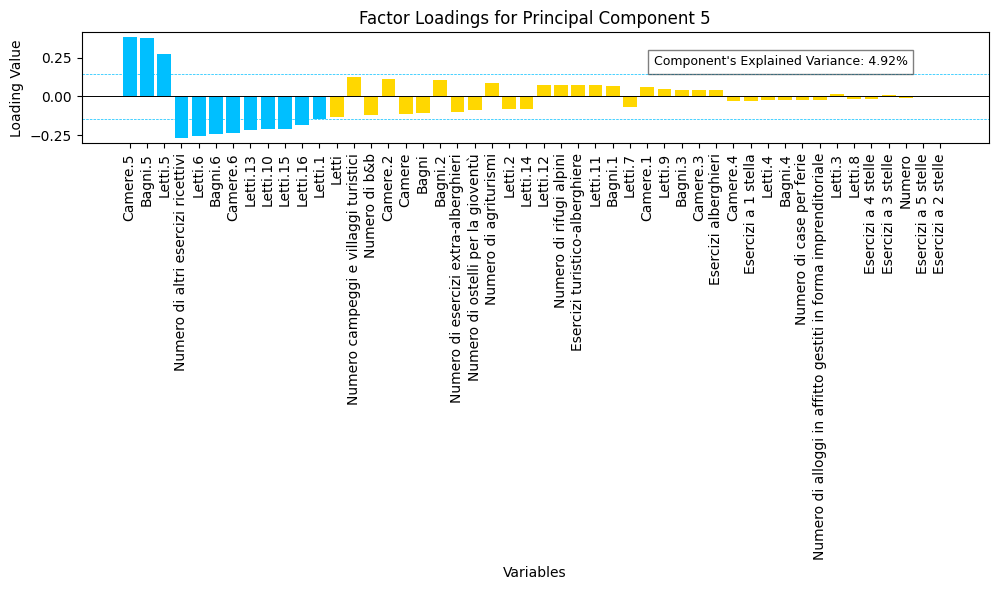

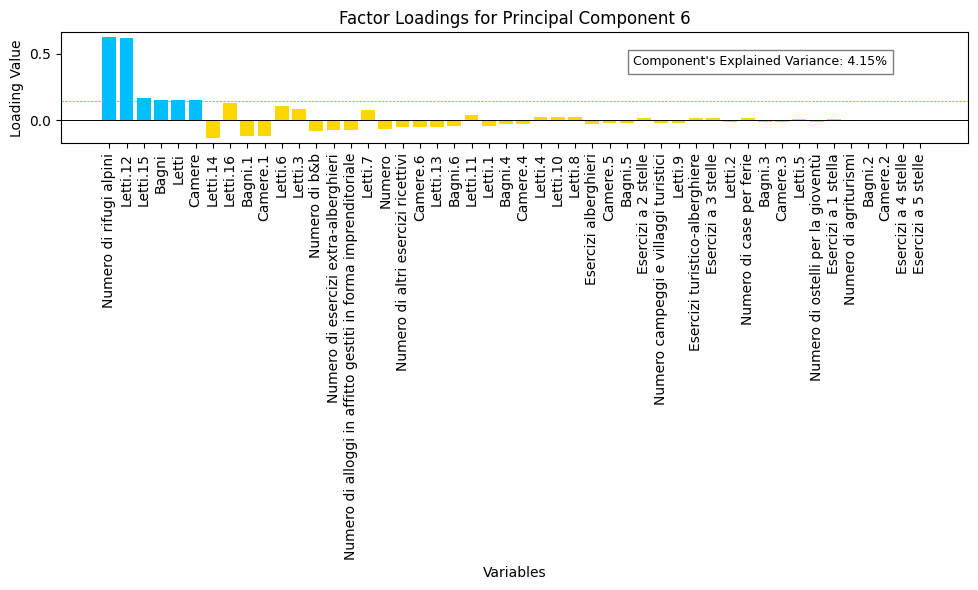

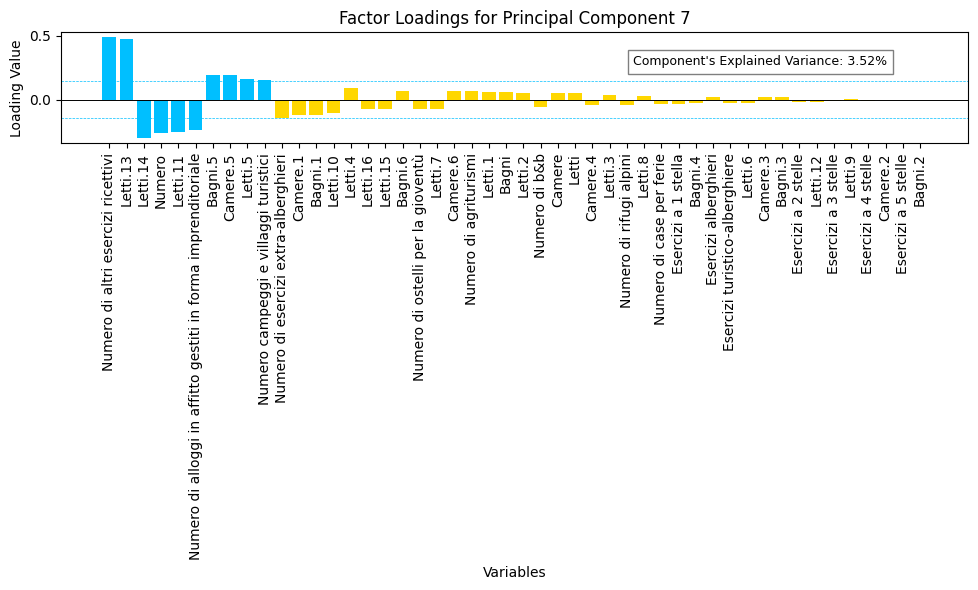

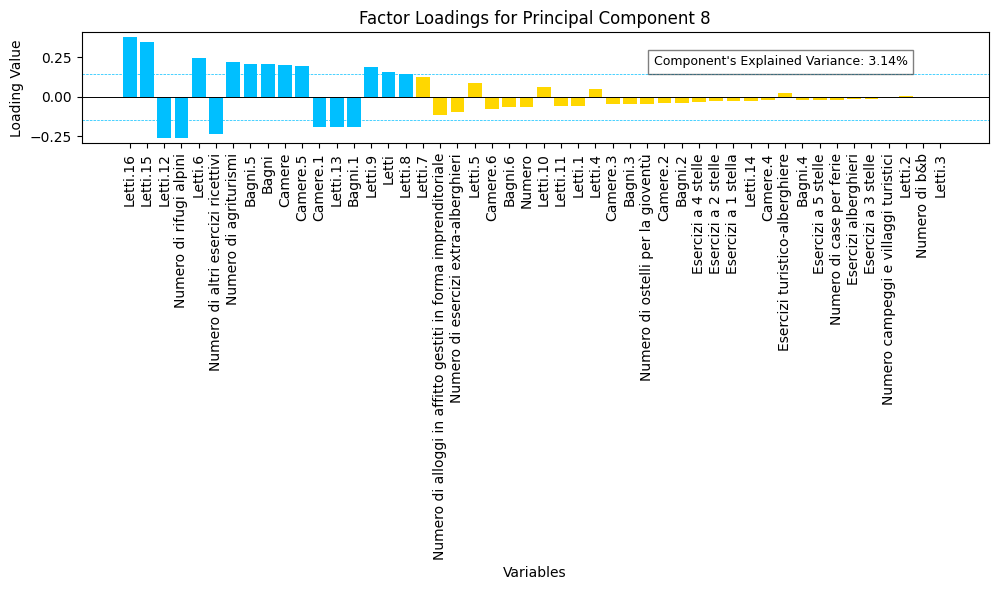

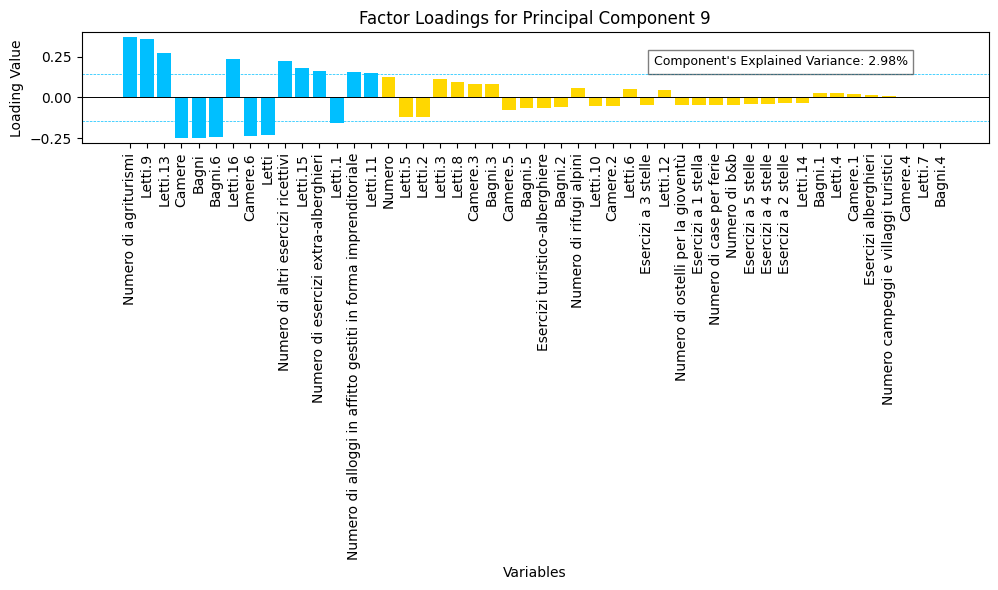

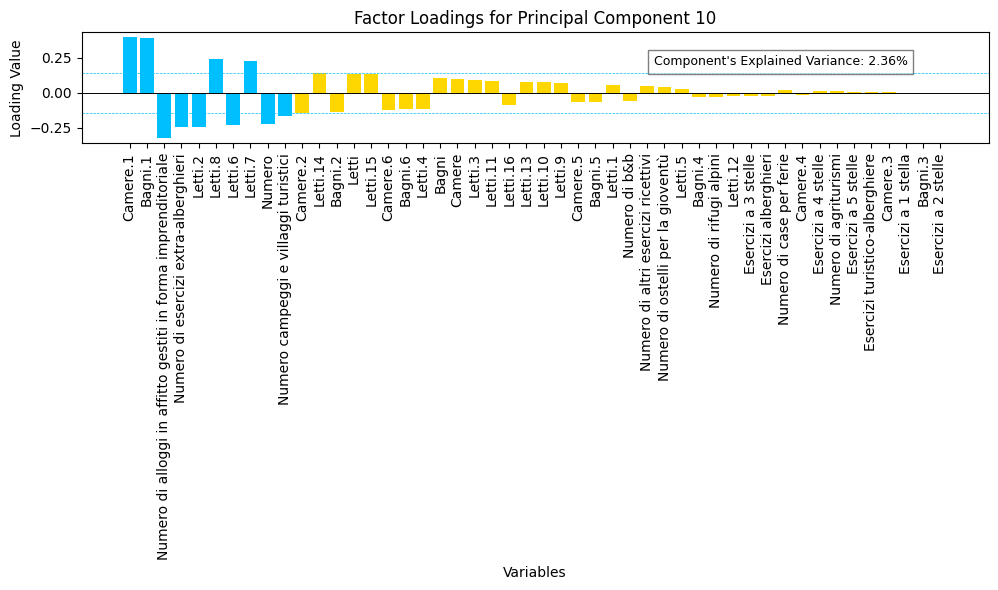

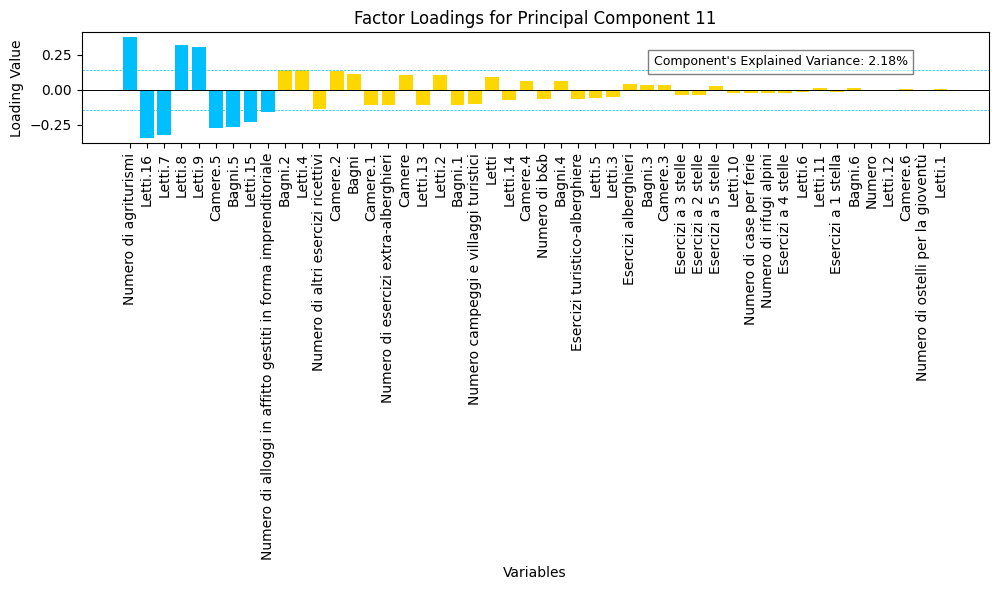

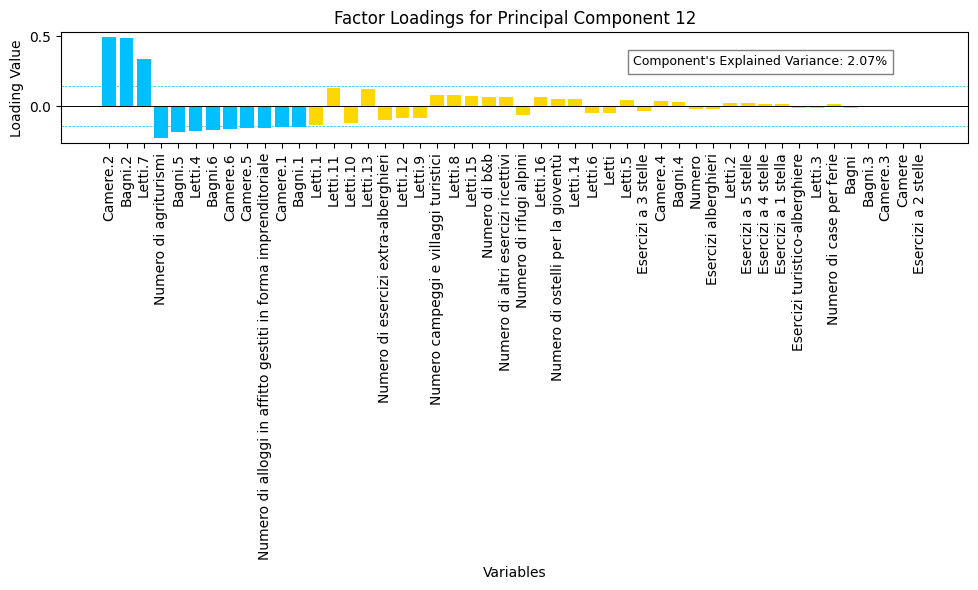

Minimum number of components to explain 80.0% of variance: 12


In [696]:
# Find index where cumulative explained variance is greater than a desired explained variance
desidered_explained_variance = 0.8
index_selected = next(x[0] for x in enumerate(cum_sum_eigenvalues) if x[1] > desidered_explained_variance) + 1
print(f'Minimum number of components to explain {desidered_explained_variance * 100}% of variance: {index_selected}')
loadings = pca.components_.T
# Plotting the components to gain an explained variance threshold before defined
for i in range(index_selected): # range(loadings.shape[1]) to plot all components
    sorted_idx = np.argsort(abs(loadings[:, i]))[::-1]
    sorted_loadings = loadings[sorted_idx, i]
    vars = x_new_cols[sorted_idx]
    std_loading = np.std(sorted_loadings)
    
    # Colors based on comparison with the mean
    colors = [color_blue if abs(loading) >= std_loading else color_yellow for loading in sorted_loadings]
    
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(sorted_loadings)), sorted_loadings, color=colors)
    plt.title(f'Factor Loadings for Principal Component {i+1}')
    plt.xticks(range(len(sorted_loadings)), vars, rotation=90)
    plt.xlabel('Variables')
    plt.ylabel('Loading Value')
    plt.axhline(std_loading, color=color_blue, linestyle='--', linewidth=0.5)
    plt.axhline(0, color='black', linewidth=0.7)
    
    if sorted_loadings.min() < std_loading * -1:
        plt.axhline(-std_loading, color=color_blue, linestyle='--', linewidth=0.5)
        
    explained_variance = exp_var_pca[i] * 100  # convert to percentage
    textstr = f"Component's Explained Variance: {explained_variance:.2f}%"
    # Place the text box in the upper left corner
    plt.gcf().text(0.65, 0.9, textstr, fontsize=9, verticalalignment='top', bbox=dict(facecolor=color_white, alpha=0.5))
    plt.tight_layout()
    plt.show()
    
# Find index where cumulative explained variance is greater than a desired explained variance
desidered_explained_variance = 0.8
index_selected = next(x[0] for x in enumerate(cum_sum_eigenvalues) if x[1] > desidered_explained_variance) + 1
print(f'Minimum number of components to explain {desidered_explained_variance * 100}% of variance: {index_selected}')

## Visulizzazione valori PRIMA componente principale: 
le città con il maggior numero di strutture alberghiere e per l'ospitalità

In [697]:
# Crea un DataFrame con gli ID dei comuni e i loro punteggi sulla prima componente
# Assumendo che tu abbia una variabile con gli ID dei comuni (es. df_originale['id_comune'])
comuni_scores = pd.DataFrame({
    'id_comune': df['id_comune'],  # Sostituisci con la tua variabile ID
    'score_pc1': x_new[:,0]  # Prima colonna = punteggi sulla prima componente principale
})

# Ordina i comuni in base ai punteggi (decrescente)
comuni_scores_ordinati = comuni_scores.sort_values('score_pc1', ascending=False)

# Visualizza i primi 10 comuni con punteggi più alti
print("Comuni con i punteggi più alti nella Componente Principale 1:")
print(comuni_scores_ordinati.head(12))

Comuni con i punteggi più alti nella Componente Principale 1:
     id_comune  score_pc1
4166    Milano  16.490288
4165    Milano  16.490288
4182    Milano  16.490288
4183    Milano  16.490288
4162    Milano  16.490288
4177    Milano  16.490288
4160    Milano  16.490288
4161    Milano  16.490288
4176    Milano  16.490288
4120    Milano  16.490288
4152    Milano  16.490288
4153    Milano  16.490288


## Visulizzazione valori SECONDA componente principale:
le città con il maggior numero di alberghi (con diverse stelle)

In [698]:
comuni_scores = pd.DataFrame({
    'id_comune': df['id_comune'],  # Sostituisci con la tua variabile ID
    'score_pc2': x_new[:,1]  # Prima colonna = punteggi sulla prima componente principale
})

# Ordina i comuni in base ai punteggi (decrescente)
comuni_scores_ordinati = comuni_scores.sort_values('score_pc2', ascending=False)

# Visualizza i primi 10 comuni con punteggi più alti
print("Comuni con i punteggi più alti nella Componente Principale 2:")
print(comuni_scores_ordinati.head(12))

Comuni con i punteggi più alti nella Componente Principale 2:
      id_comune  score_pc2
13349      Roma  20.510305
13231      Roma  20.510305
13230      Roma  20.510305
13229      Roma  20.510305
13228      Roma  20.510305
13227      Roma  20.510305
13226      Roma  20.510305
13225      Roma  20.510305
13224      Roma  20.510305
13370      Roma  20.510305
13239      Roma  20.510305
13335      Roma  20.510305


## Visulizzazione valori TERZA componente principale:
le città con più strutture più capienti

In [699]:
comuni_scores = pd.DataFrame({
    'id_comune': df['id_comune'],  # Sostituisci con la tua variabile ID
    'score_pc3': x_new[:,2]  # Prima colonna = punteggi sulla prima componente principale
})

# Ordina i comuni in base ai punteggi (decrescente)
comuni_scores_ordinati = comuni_scores.sort_values('score_pc3', ascending=False)

# Visualizza i primi 10 comuni con punteggi più alti
print("Comuni con i punteggi più alti nella Componente Principale 3:")
print(comuni_scores_ordinati.head(12))

Comuni con i punteggi più alti nella Componente Principale 3:
      id_comune  score_pc3
13256      Roma   9.577358
13272      Roma   9.577358
13273      Roma   9.577358
13274      Roma   9.577358
13275      Roma   9.577358
13276      Roma   9.577358
13277      Roma   9.577358
13260      Roma   9.577358
13279      Roma   9.577358
13280      Roma   9.577358
13281      Roma   9.577358
13282      Roma   9.577358


## Visulizzazione valori QUARTA componente principale:
le città con la mggior parte degli alberghi a poche stelle

In [700]:
comuni_scores = pd.DataFrame({
    'id_comune': df['id_comune'],  # Sostituisci con la tua variabile ID
    'score_pc4': x_new[:,3]  # Prima colonna = punteggi sulla prima componente principale
})

# Ordina i comuni in base ai punteggi (decrescente)
comuni_scores_ordinati = comuni_scores.sort_values('score_pc4', ascending=False)

# Visualizza i primi 10 comuni con punteggi più alti
print("Comuni con i punteggi più alti nella Componente Principale 4:")
print(comuni_scores_ordinati.head(12))

Comuni con i punteggi più alti nella Componente Principale 4:
     id_comune  score_pc4
4146    Milano  15.113953
4125    Milano  15.113953
4127    Milano  15.113953
4128    Milano  15.113953
4114    Milano  15.113953
4186    Milano  15.113953
4187    Milano  15.113953
4188    Milano  15.113953
4134    Milano  15.113953
4151    Milano  15.113953
4137    Milano  15.113953
4142    Milano  15.113953


## Visulizzazione valori QUINTA componente principale

In [701]:
comuni_scores = pd.DataFrame({
    'id_comune': df['id_comune'],  # Sostituisci con la tua variabile ID
    'score_pc5': x_new[:,4]  # Prima colonna = punteggi sulla prima componente principale
})

# Ordina i comuni in base ai punteggi (decrescente)
comuni_scores_ordinati = comuni_scores.sort_values('score_pc5', ascending=False)

# Visualizza i primi 10 comuni con punteggi più alti
print("Comuni con i punteggi più alti nella Componente Principale 5:")
print(comuni_scores_ordinati.head(12))

Comuni con i punteggi più alti nella Componente Principale 5:
      id_comune  score_pc5
12301  Grosseto   9.149912
12308  Grosseto   9.149912
12307  Grosseto   9.149912
12309  Grosseto   9.149912
12311  Grosseto   9.149912
12315  Grosseto   9.149912
12302  Grosseto   9.149912
12314  Grosseto   9.149912
12305  Grosseto   9.149912
12306  Grosseto   9.149912
12313  Grosseto   9.149912
12312  Grosseto   9.149912


## Visulizzazione valori SESTA componente principale

In [702]:
comuni_scores = pd.DataFrame({
    'id_comune': df['id_comune'],  # Sostituisci con la tua variabile ID
    'score_pc6': x_new[:,5]  # Prima colonna = punteggi sulla prima componente principale
})

# Ordina i comuni in base ai punteggi (decrescente)
comuni_scores_ordinati = comuni_scores.sort_values('score_pc6', ascending=False)

# Visualizza i primi 10 comuni con punteggi più alti
print("Comuni con i punteggi più alti nella Componente Principale 6:")
print(comuni_scores_ordinati.head(12))

Comuni con i punteggi più alti nella Componente Principale 6:
              id_comune  score_pc6
1398            Vinadio  27.070857
1397            Vinadio  27.070857
1399            Vinadio  27.070857
1400            Vinadio  27.070857
8176  Cortina d'Ampezzo  24.641755
8178  Cortina d'Ampezzo  24.641755
8177  Cortina d'Ampezzo  24.641755
1858         Courmayeur  24.197878
1851         Courmayeur  24.197878
1855         Courmayeur  24.197878
1854         Courmayeur  24.197878
1856         Courmayeur  24.197878


## Visulizzazione valori SETTIMA componente principale

In [703]:
comuni_scores = pd.DataFrame({
    'id_comune': df['id_comune'],  # Sostituisci con la tua variabile ID
    'score_pc7': x_new[:,6]  # Prima colonna = punteggi sulla prima componente principale
})

# Ordina i comuni in base ai punteggi (decrescente)
comuni_scores_ordinati = comuni_scores.sort_values('score_pc7', ascending=False)

# Visualizza i primi 10 comuni con punteggi più alti
print("Comuni con i punteggi più alti nella Componente Principale 7:")
print(comuni_scores_ordinati.head(12))

Comuni con i punteggi più alti nella Componente Principale 7:
      id_comune  score_pc7
13575  Minturno  11.423804
13572  Minturno  11.423804
13577  Minturno  11.423804
13576  Minturno  11.423804
13574  Minturno  11.423804
13573  Minturno  11.423804
13578  Minturno  11.423804
13580  Minturno  11.423804
13579  Minturno  11.423804
13521     Gaeta  11.423007
13514     Gaeta  11.423007
13516     Gaeta  11.423007


## Visulizzazione valori OTTAVA componente principale

In [704]:
comuni_scores = pd.DataFrame({
    'id_comune': df['id_comune'],  # Sostituisci con la tua variabile ID
    'score_pc8': x_new[:,7]  # Prima colonna = punteggi sulla prima componente principale
})

# Ordina i comuni in base ai punteggi (decrescente)
comuni_scores_ordinati = comuni_scores.sort_values('score_pc8', ascending=False)

# Visualizza i primi 10 comuni con punteggi più alti
print("Comuni con i punteggi più alti nella Componente Principale 8:")
print(comuni_scores_ordinati.head(12))

Comuni con i punteggi più alti nella Componente Principale 8:
         id_comune  score_pc8
8683        Jesolo   6.046712
8681        Jesolo   6.046712
8682        Jesolo   6.046712
8676        Jesolo   6.046712
8677        Jesolo   6.046712
8674        Jesolo   6.046712
8679        Jesolo   6.046712
8680        Jesolo   6.046712
8678        Jesolo   6.046712
8675        Jesolo   6.046712
21509  Villasimius   5.552258
21507  Villasimius   5.552258


## Visualizzazione valori NONA componente principale

In [705]:
comuni_scores = pd.DataFrame({
    'id_comune': df['id_comune'],  # Sostituisci con la tua variabile ID
    'score_pc9': x_new[:,8]  # Prima colonna = punteggi sulla prima componente principale
})

# Ordina i comuni in base ai punteggi (decrescente)
comuni_scores_ordinati = comuni_scores.sort_values('score_pc9', ascending=False)

# Visualizza i primi 10 comuni con punteggi più alti
print("Comuni con i punteggi più alti nella Componente Principale 9:")
print(comuni_scores_ordinati.head(12))

Comuni con i punteggi più alti nella Componente Principale 9:
      id_comune  score_pc9
12395    Assisi   6.379396
12398    Assisi   6.379396
12394    Assisi   6.379396
12396    Assisi   6.379396
12399    Assisi   6.379396
12397    Assisi   6.379396
12400    Assisi   6.379396
12302  Grosseto   6.296754
12309  Grosseto   6.296754
12306  Grosseto   6.296754
12304  Grosseto   6.296754
12303  Grosseto   6.296754


## Visualizzazione valori DECIMA componente principale

In [706]:
comuni_scores = pd.DataFrame({
    'id_comune': df['id_comune'],  # Sostituisci con la tua variabile ID
    'score_pc10': x_new[:,9]  # Prima colonna = punteggi sulla prima componente principale
})

# Ordina i comuni in base ai punteggi (decrescente)
comuni_scores_ordinati = comuni_scores.sort_values('score_pc10', ascending=False)

# Visualizza i primi 10 comuni con punteggi più alti
print("Comuni con i punteggi più alti nella Componente Principale 10:")
print(comuni_scores_ordinati.head(12))

Comuni con i punteggi più alti nella Componente Principale 10:
             id_comune  score_pc10
11502  Forte dei Marmi    6.562069
11501  Forte dei Marmi    6.562069
11500  Forte dei Marmi    6.562069
11498  Forte dei Marmi    6.562069
11499  Forte dei Marmi    6.562069
18967          Sciacca    6.471003
18972          Sciacca    6.471003
18964          Sciacca    6.471003
18965          Sciacca    6.471003
18963          Sciacca    6.471003
18962          Sciacca    6.471003
18969          Sciacca    6.471003


## Visualizzazione valori UNDICESIMA componente principale

In [707]:
comuni_scores = pd.DataFrame({
    'id_comune': df['id_comune'],  # Sostituisci con la tua variabile ID
    'score_pc11': x_new[:,10]  # Prima colonna = punteggi sulla prima componente principale
})

# Ordina i comuni in base ai punteggi (decrescente)
comuni_scores_ordinati = comuni_scores.sort_values('score_pc11', ascending=False)

# Visualizza i primi 10 comuni con punteggi più alti
print("Comuni con i punteggi più alti nella Componente Principale 11:")
print(comuni_scores_ordinati.head(12))

Comuni con i punteggi più alti nella Componente Principale 11:
          id_comune  score_pc11
12050       Cortona    6.398982
12049       Cortona    6.398982
12052       Cortona    6.398982
12051       Cortona    6.398982
6583   Valle Aurina    6.093082
6586   Valle Aurina    6.093082
6582   Valle Aurina    6.093082
6581   Valle Aurina    6.093082
6585   Valle Aurina    6.093082
6584   Valle Aurina    6.093082
12268    Montalcino    5.660524
12269    Montalcino    5.660524


## Visualizzazione valori DODICESIMA componente principale

In [708]:
comuni_scores = pd.DataFrame({
    'id_comune': df['id_comune'],  # Sostituisci con la tua variabile ID
    'score_pc12': x_new[:,11]  # Prima colonna = punteggi sulla prima componente principale
})

# Ordina i comuni in base ai punteggi (decrescente)
comuni_scores_ordinati = comuni_scores.sort_values('score_pc12', ascending=False)

# Visualizza i primi 10 comuni con punteggi più alti
print("Comuni con i punteggi più alti nella Componente Principale 12:")
print(comuni_scores_ordinati.head(12))

Comuni con i punteggi più alti nella Componente Principale 12:
              id_comune  score_pc12
5055   Limone sul Garda    7.153464
5053   Limone sul Garda    7.153464
5052   Limone sul Garda    7.153464
5054   Limone sul Garda    7.153464
6914            Molveno    6.983876
6915            Molveno    6.983876
13454         Fiumicino    6.305854
13456         Fiumicino    6.305854
13455         Fiumicino    6.305854
13451         Fiumicino    6.305854
13452         Fiumicino    6.305854
13449         Fiumicino    6.305854


In [709]:
# Creazione del nuovo DataFrame con le 9 componenti principali
df_principal_components = pd.DataFrame({
    'PC_Economica': principal_components_df['PC1'],  # Prima componente economica
    'PC_Turistica_1': x_new[:, 0],  # Prima componente turistica
    'PC_Turistica_2': x_new[:, 1],  # Seconda componente turistica
    'PC_Turistica_3': x_new[:, 2],  # Terza componente turistica
    'PC_Turistica_4': x_new[:, 3],  # Quarta componente turistica
    'PC_Turistica_5': x_new[:, 4],  # Quinta componente turistica
    'PC_Turistica_6': x_new[:, 5],  # Sesta componente turistica
    'PC_Turistica_7': x_new[:, 6],  # Settima componente turistica
    'PC_Turistica_8': x_new[:, 7],   # Ottava componente turistica
    'PC_Turistica_9': x_new[:, 8],   # Nona componente turistica
    'PC_Turistica_10': x_new[:, 9],  # Decima componente turistica
    'PC_Turistica_11': x_new[:, 10],  # Undicesima componente turistica
    'PC_Turistica_12': x_new[:, 11]   # Dodicesima componente turistica
})

# Visualizzazione delle prime righe del nuovo DataFrame
print(df_principal_components.head())
df_principal_components.info()

   PC_Economica  PC_Turistica_1  PC_Turistica_2  PC_Turistica_3  \
0     -0.628915       -1.756610        0.677273       -0.783324   
1     -0.628915       -1.756610        0.677273       -0.783324   
2     -0.662494       -1.896825        0.740931       -0.923257   
3     -0.662494       -1.896825        0.740931       -0.923257   
4     -0.665231       -1.529231        0.452196       -0.448528   

   PC_Turistica_4  PC_Turistica_5  PC_Turistica_6  PC_Turistica_7  \
0       -0.426110        0.337035       -0.215494       -0.042894   
1       -0.426110        0.337035       -0.215494       -0.042894   
2       -0.451321        0.464968       -0.260174        0.085540   
3       -0.451321        0.464968       -0.260174        0.085540   
4       -0.084765        0.061554       -0.058971       -0.061588   

   PC_Turistica_8  PC_Turistica_9  PC_Turistica_10  PC_Turistica_11  \
0       -0.156302        0.068510         0.132206         0.169843   
1       -0.156302        0.068510       

In [710]:
# List of columns to drop
columns_to_exclude = [
    "Reddito Pro-Capite per l'anno di riferimento", "Reddito da fabbricati - Frequenza",
    "Reddito da lavoro dipendente e assimilati - Frequenza", "Reddito da pensione - Frequenza",
    "Reddito da lavoro autonomo (comprensivo dei valori nulli) - Frequenza",
    "Reddito di spettanza dell'imprenditore in contabilita' ordinaria  (comprensivo dei valori nulli) - Frequenza",
    "Reddito di spettanza dell'imprenditore in contabilita' semplificata (comprensivo dei valori nulli) - Frequenza",
    "Reddito complessivo minore o uguale a zero euro - Frequenza",
    "Reddito complessivo da 0 a 10000 euro - Frequenza",
    "Reddito complessivo da 10000 a 15000 euro - Frequenza",
    "Reddito complessivo da 15000 a 26000 euro - Frequenza",
    "Reddito complessivo da 26000 a 55000 euro - Frequenza",
    "Reddito complessivo da 55000 a 75000 euro - Frequenza",
    "Reddito complessivo da 75000 a 120000 euro - Frequenza",
    "Reddito complessivo oltre 120000 euro - Frequenza",
    "Esercizi a 5 stelle", "Letti", "Camere", "Bagni", "Esercizi a 4 stelle", "Letti.1",
    "Camere.1", "Bagni.1", "Esercizi a 3 stelle", "Letti.2", "Camere.2", "Bagni.2",
    "Esercizi a 2 stelle", "Letti.3", "Camere.3", "Bagni.3", "Esercizi a 1 stella",
    "Letti.4", "Camere.4", "Bagni.4", "Esercizi turistico-alberghiere", "Letti.5",
    "Camere.5", "Bagni.5", "Esercizi alberghieri", "Letti.6", "Camere.6", "Bagni.6",
    "Numero campeggi e villaggi turistici", "Letti.7", "Numero di alloggi in affitto gestiti in forma imprenditoriale",
    "Letti.8", "Numero di agriturismi", "Letti.9", "Numero di ostelli per la gioventù",
    "Letti.10", "Numero di case per ferie", "Letti.11", "Numero di rifugi alpini",
    "Letti.12", "Numero di altri esercizi ricettivi", "Letti.13", "Numero di b&b",
    "Letti.14", "Numero di esercizi extra-alberghieri", "Letti.15", "Numero", "Letti.16"
]

# Drop the columns from df_original
df_filtered = df.drop(columns=columns_to_exclude, errors='ignore')

# Merge with df_principal_components
df_with_pca = pd.merge(df_filtered, df_principal_components, left_index=True, right_index=True, how='inner')


In [711]:
df_with_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21513 entries, 0 to 21512
Data columns (total 48 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   id_istat                                                        21513 non-null  int64  
 1   id_comune                                                       21512 non-null  object 
 2   Provincia                                                       21513 non-null  object 
 3   Regione                                                         21513 non-null  object 
 4   Ripartizione Geografica                                         21513 non-null  object 
 5   id_catastale                                                    21513 non-null  object 
 6   Indice di spopolamento                                          21512 non-null  float64
 7   Codice regione                                   

In [712]:
# convert df_true into csv
df_with_pca.to_csv("data/df_with_pca.csv", index=False)
print("df_with_pca saved as df_with_pca.csv")

df_with_pca saved as df_with_pca.csv
